# Exploration

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/raw_data/indian_liver_patient.csv')

# Display the first few rows of the dataset
print(df.head())

# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

# Checking for missing values
print(60*"-")
print("Missing values: ")
print(df.isnull().sum())


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

# Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling missing values
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

# Encoding categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Standardizing numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Feature Selection

Feature Importances:
                      Feature  Importance
4        Alkaline_Phosphotase    0.147298
6  Aspartate_Aminotransferase    0.131862
5    Alamine_Aminotransferase    0.130871
0                         Age    0.127996
2             Total_Bilirubin    0.102002
8                     Albumin    0.090741
7              Total_Protiens    0.089479
3            Direct_Bilirubin    0.081841
9  Albumin_and_Globulin_Ratio    0.078588
1                      Gender    0.019323


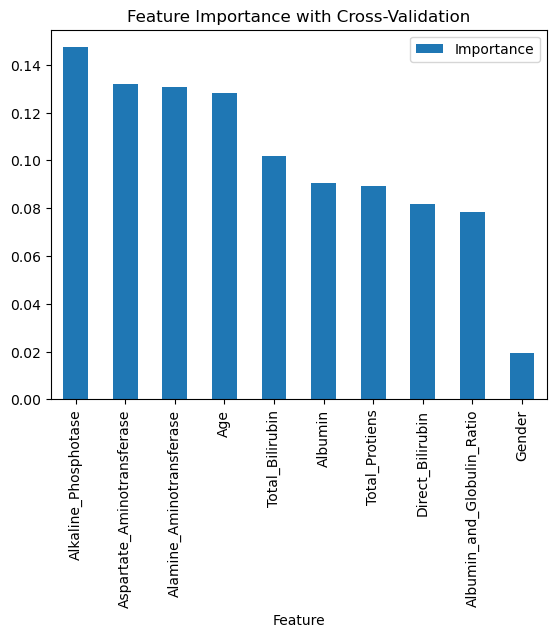

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define features and target variable
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Initialize Random Forest Classifier
model = RandomForestClassifier()

# Define number of splits and repeats
n_splits = 10
n_repeats = 10

# Feature importance with cross-validation
rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
feature_importances = np.zeros(X.shape[1])

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    feature_importances += model.feature_importances_

# Averaging over the number of splits and repeats
feature_importances /= (n_splits * n_repeats)

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importances_df)

# Visualizing feature importance
feature_importances_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importance with Cross-Validation')
plt.show()


# Model Building with Cross Validation

# Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the model
log_reg = LogisticRegression()

# Perform cross-validation and compute the mean accuracy
cv_scores = cross_val_score(log_reg, X, y, cv=10)  # 10-fold cross-validation
mean_cv_score = cv_scores.mean()

print(f"Mean CV Accuracy (Logistic Regression): {mean_cv_score:.4f}")


Mean CV Accuracy (Logistic Regression): 0.7222


# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_clf = RandomForestClassifier()

# Perform cross-validation and compute the mean accuracy
cv_scores = cross_val_score(rf_clf, X, y, cv=10)  # 10-fold cross-validation
mean_cv_score = cv_scores.mean()

print(f"Mean CV Accuracy (Random Forest): {mean_cv_score:.4f}")


Mean CV Accuracy (Random Forest): 0.7067


# Hyperparameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X, y)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None,

# Advanced Model

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5]
}

# Adjusting the target variable
y_adjusted = y - 1

# Create a GridSearchCV object with the adjusted target variable
grid_search_xg = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_xg.fit(X, y_adjusted)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search_xg.best_params_}")
print(f"Best Score: {grid_search_xg.best_score_:.4f}")


Fitting 10 folds for each of 245 candidates, totalling 2450 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, 

In [10]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y_adjusted)


# Define individual models
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=100)
model3 = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)

# Define the Voting Ensemble
voting_clf = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('xgb', model3)], voting='soft')

# Evaluate with cross-validation
cv_scores = cross_val_score(voting_clf, X_resampled, y_resampled, cv=10, scoring='accuracy')
mean_cv_score = cv_scores.mean()
print(f"Mean CV Accuracy (Voting Ensemble): {mean_cv_score:.4f}")


Mean CV Accuracy (Voting Ensemble): 0.7609


# Fine Tuning Random Forest Model

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search
grid_search_rf.fit(X_resampled, y_resampled)

# Print the best parameters and score
print("Best Parameters for RandomForest:", grid_search_rf.best_params_)
print("Best Score for RandomForest:", grid_search_rf.best_score_)




Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_

# Exploring different Combinations
# Best Parameters for RandomForest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}

In [16]:
# Update the models with the best parameters
model1 = LogisticRegression()
model2 = RandomForestClassifier(**grid_search_rf.best_params_)
#Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
#model3 = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)
model3 = XGBClassifier(**grid_search_xg.best_params_)

# Experiment with different combinations
voting_clf = VotingClassifier(estimators=[
    ('lr', model1), 
    ('rf', model2), 
    ('xgb', model3)
], voting='soft')

# Evaluate with cross-validation
cv_scores = cross_val_score(voting_clf, X_resampled, y_resampled, cv=10, scoring='accuracy')
mean_cv_score = cv_scores.mean()
print("Mean CV Accuracy (Updated Voting Ensemble):", mean_cv_score)


Mean CV Accuracy (Updated Voting Ensemble): 0.7608577165806081
